# Lesson 2 - Space & Time

## Notes:
* if the spatial spacing gets too small, then the speed of the wave has not progressed to the next space-step by the time the step comes about. this leads to the instability found in the corner regions of the square wave.
* in order to keep the entire region stable, one solution is to calculate dt with respect to dx. keeping cdt within the dx is key to making sure no aspects of the curve blow. The CFL number $\sigma$ is given by the following:
$$\sigma = \frac{c\Delta t}{\Delta x}\leq 1$$

## Code: 
all the code will follow this cell. This is to ease runtime and to make sure the scope of all variables remains the same. different iterations of the same code with different values or methods of computing the same solution will be in subsquent cells, while code-notes will be commented like usual.

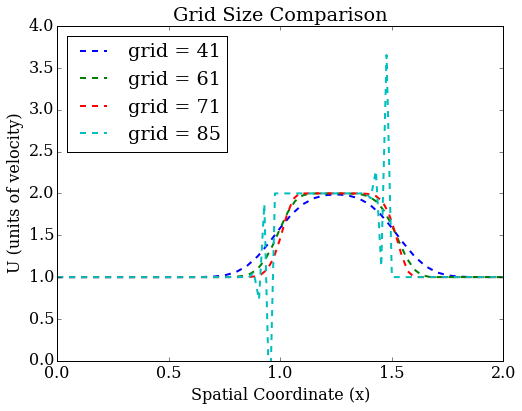

In [11]:
'''going to create a linear convection function to mess with
grid size only. While the notebook has each different grid
size plotted, it makes more sense to plot everything on one
big plot to see the various changes.'''

import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16

##creating function to accept only grid size as parameters
def lin_con(nx):
    '''solve the linear convection equation:
    
    solves the equation d_t u + c d_x u = 0 where 
    * the wavespeed c is set to 1
    * the domain is x \in [0, 2]
    * 20 timesteps are taken, with \Delta t = 0.025
    * the initial data is the hat function
    
    Produces a plot of the results
    
    Parameters
    ----------
    
    nx : integer
        number of internal grid points
        
    Returns
    -------
    
    u : vector
        vector of solved values'''
    
    xdom = 2
    dx = xdom/(nx-1)
    nt = 20    
    dt = .025  
    c = 1
    
    x = numpy.linspace(0,xdom,nx)

    u = numpy.ones(nx)
    u[numpy.intersect1d(numpy.where(x>=.5),
                        numpy.where(x<=1))]=2

    un = numpy.ones(nx) 

    for n in range(nt): 
        un = u.copy() 
        u[1:] = un[1:] -c*dt/dx*(un[1:] -un[0:-1]) 
        u[0] = 1.0
    return (x,u)

#create different grid sizes
(x41,u41)=lin_con(41)
(x61,u61)=lin_con(61)
(x71,u71)=lin_con(71)
(x85,u85)=lin_con(85)

# Visualize
pyplot.figure(figsize=(8,6))
pyplot.title('Grid Size Comparison')
pyplot.ylabel('U (units of velocity)')
pyplot.xlabel('Spatial Coordinate (x)')
pyplot.ylim(0,4)
pyplot.plot(x41,u41,ls='--',lw=2)
pyplot.plot(x61,u61,ls='--',lw=2)
pyplot.plot(x71,u71,ls='--',lw=2)
pyplot.plot(x85,u85,ls='--',lw=2)
pyplot.legend(['grid = 41','grid = 61',
               'grid = 71', 'grid = 85'], loc='upper left')

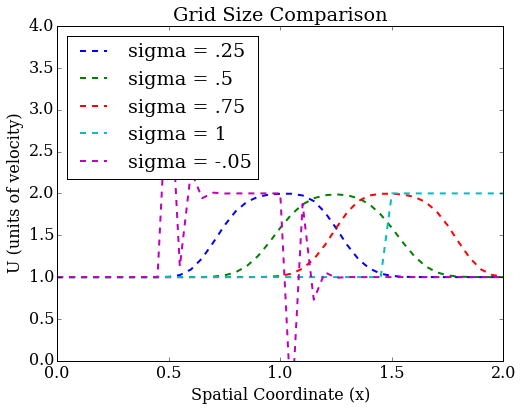

In [7]:
'''going to create a linear convection function to mess with
grid size only. While the notebook has each different grid
size plotted, it makes more sense to plot everything on one
big plot to see the various changes. Also here, we will use the
CFL number to make sure all grids will follow some shape that
is similar to the original curve'''

import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16

##creating function to accept only grid size as parameters
def lin_con(nx,sigma):
    '''solve the linear convection equation:
    
    solves the equation d_t u + c d_x u = 0 where 
    * the wavespeed c is set to 1
    * the domain is x \in [0, 2]
    * 20 timesteps are taken, with \Delta t = 0.025
    * the initial data is the hat function
    
    Produces a plot of the results
    
    Parameters
    ----------
    
    nx : integer
        number of internal grid points
        
    Returns
    -------
    
    u : vector
        vector of solved values'''
    
    xdom = 2
    dx = xdom/(nx-1)
    nt = 20     
    c = 1
    
    x = numpy.linspace(0,xdom,nx)

    dt = sigma*dx
    
    u = numpy.ones(nx)
    u[numpy.intersect1d(numpy.where(x>=.5),
                        numpy.where(x<=1))]=2

    un = numpy.ones(nx) 

    for n in range(nt): 
        un = u.copy() 
        u[1:] = un[1:] -c*dt/dx*(un[1:] -un[0:-1]) 
        u[0] = 1.0
    return (x,u)

#create different grid sizes
(x41,u41)=lin_con(41,.25)
(x61,u61)=lin_con(41,.5)
(x71,u71)=lin_con(41,.75)
(x85,u85)=lin_con(41,1)
(x10001, u10001) = lin_con(41,-.05)

# Visualize
pyplot.figure(figsize=(8,6))
pyplot.title('Grid Size Comparison')
pyplot.ylabel('U (units of velocity)')
pyplot.xlabel('Spatial Coordinate (x)')
pyplot.ylim(0,4)
pyplot.plot(x41,u41,ls='--',lw=2)
pyplot.plot(x61,u61,ls='--',lw=2)
pyplot.plot(x71,u71,ls='--',lw=2)
pyplot.plot(x85,u85,ls='--',lw=2)
pyplot.plot(x10001,u10001,ls='--',lw=2)
'''pyplot.legend(['grid = 41','grid = 61',
               'grid = 71', 'grid = 85','grid = 10001'],
              loc='upper left')'''
pyplot.legend(['sigma = .25','sigma = .5',
               'sigma = .75', 'sigma = 1','sigma = -.05'],
              loc='upper left')

/home/akshaya/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:56: RuntimeWarning: overflow encountered in multiply
/home/akshaya/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:56: RuntimeWarning: invalid value encountered in subtract


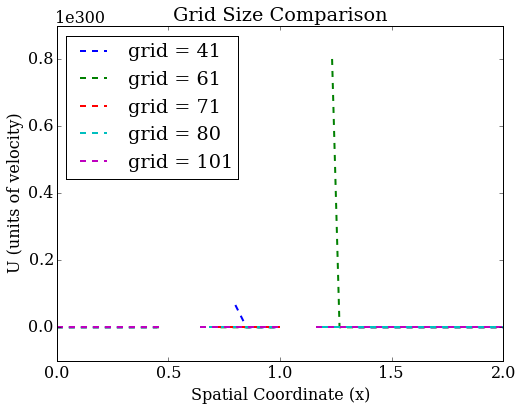

In [11]:
'''going to create nonlinear convection function to mess with
grid size only. While the notebook has each different grid
size plotted, it makes more sense to plot everything on one
big plot to see the various changes. Also here, we will use the
CFL number to make sure all grids will follow some shape that
is similar to the original curve'''

import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16

##creating function to accept only grid size as parameters
def lin_con(nx):
    '''solve the linear convection equation:
    
    solves the equation d_t u + c d_x u = 0 where 
    * the wavespeed c is set to 1
    * the domain is x \in [0, 2]
    * 20 timesteps are taken, with \Delta t = 0.025
    * the initial data is the hat function
    
    Produces a plot of the results
    
    Parameters
    ----------
    
    nx : integer
        number of internal grid points
        
    Returns
    -------
    
    u : vector
        vector of solved values'''
    
    xdom = 2
    dx = xdom/(nx-1)
    nt =10    
    sigma = .5 
    #c = 1 - not needed in nonlinear case
    
    x = numpy.linspace(0,xdom,nx)

    #dt = sigma*dx
    dt=0.2
    u = numpy.ones(nx)
    u[numpy.intersect1d(numpy.where(x>=.5),
                        numpy.where(x<=1))]=2

    un = numpy.ones(nx) 

    for n in range(nt): 
        un = u.copy() 
        u[1:] = un[1:] -un[1:]*dt/dx*(un[1:] -un[0:-1]) 
        u[0] = 1.0
    return (x,u)

#create different grid sizes
(x41,u41)=lin_con(41)
(x61,u61)=lin_con(61)
(x71,u71)=lin_con(71)
(x85,u85)=lin_con(80)
(x10001, u10001) = lin_con(101)

# Visualize
pyplot.figure(figsize=(8,6))
pyplot.title('Grid Size Comparison')
pyplot.ylabel('U (units of velocity)')
pyplot.xlabel('Spatial Coordinate (x)')
#pyplot.ylim(0,10)
pyplot.plot(x41,u41,ls='--',lw=2)
pyplot.plot(x61,u61,ls='--',lw=2)
pyplot.plot(x71,u71,ls='--',lw=2)
pyplot.plot(x85,u85,ls='--',lw=2)
pyplot.plot(x10001,u10001,ls='--',lw=2)
pyplot.legend(['grid = 41','grid = 61',
               'grid = 71', 'grid = 80','grid = 101'],
              loc='upper left')